In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Reading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/Shobhit-Kaushal-2604/DIY-Project-_VOIS/main/DoctorVisits%20-%20DA.csv")
data.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [12]:
# Columns of the dataset
data.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [13]:
# Shape (No. of rows, No. of columns) of the dataset
data.shape

(5190, 13)

In [ ]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [ ]:
# No .of unique values in each column
data.nunique()

Unnamed: 0    5190
visits          10
gender           2
age             12
income          14
illness          6
reduced         15
health          13
private          2
freepoor         2
freerepat        2
nchronic         2
lchronic         2
dtype: int64

In [ ]:
# Unique values in each column
for col in data.columns:
  print(f"{col} - {data[col].unique()}")

Unnamed: 0 - [   1    2    3 ... 5188 5189 5190]
visits - [1 2 3 4 8 5 7 6 9 0]
gender - ['female' 'male']
age - [0.19 0.22 0.27 0.32 0.37 0.42 0.47 0.52 0.57 0.62 0.67 0.72]
income - [0.55 0.45 0.9  0.15 0.35 0.65 0.25 0.   0.06 1.1  0.75 0.01 1.3  1.5 ]
illness - [1 3 2 5 4 0]
reduced - [ 4  2  0  5  1 13  7  3 14  6  8  9 10 12 11]
health - [ 1  0  9  2  6  5  7 11  4 12  3 10  8]
private - ['yes' 'no']
freepoor - ['no' 'yes']
freerepat - ['no' 'yes']
nchronic - ['no' 'yes']
lchronic - ['no' 'yes']


In [ ]:
# As the age was in decimal, we are converting it into integers
data.age = [int(str(val).split(".")[1]) for val in data.age]

In [ ]:
# Here we are converting the income in Indian ruppees (Assuming it was in lakhs)
data.income = (data.income*100000).astype(int)

In [ ]:
# Renaming the column to patient_id
data.rename(columns={"Unnamed: 0":"patient_id"},inplace=True)

In [ ]:
data.head()

,patient_id,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,19,0.45,2,5,1,no,no,no,yes,no


In [ ]:
# Details of values in each column
for col in data.columns:
  if data[col].dtypes == "object":
    print(f"{col} : {data[col].unique()}")
  else:
    print(f"{col} : {data[col].min()}-{data[col].max()}")

patient_id : 1-5190
visits : 0-9
gender : ['female' 'male']
age : 19-72
income : 0.0-1.5
illness : 0-5
reduced : 0-14
health : 0-12
private : ['yes' 'no']
freepoor : ['no' 'yes']
freerepat : ['no' 'yes']
nchronic : ['no' 'yes']
lchronic : ['no' 'yes']


### About the dataset
1. **patient_id** - ranges from 1 to 5190
2. **visits** - no. of doctor visits that ranges from 0 to 9
3. **gender** - gender of the patient .i.e. ['female', 'male']
4. **age** - age of the patient that ranges from 19-72
5. **income** - income of the patient in Rupees ranges from 0 to 150000
6. **illness** - no. of illnesses the patient has experienced in a given timeframe
7. **reduced** - no. of days of reduced activity due to illness or health issues
8. **health** - health status, possibly on a scale where a higher number represents better or worse health ranges from 0 to 12
9. **private** - whether the patient has private health insurance .i.e. ['yes', 'no']
10. **freepoor** - whether the patient qualifies for free healthcare due to low income .i.e. ['yes', 'no']
11. **freerepat** - whether the patient qualifies for free healthcare due to being a old age, disability, veteran or similar status .i.e. ['yes', 'no']
12. **nchronic** - whether the patient has a chronic condition .i.e. ['yes', 'no']
13. **lchronic** - whether the patient has long-term chronic conditions .i.e. ['yes', 'no']

In [ ]:
# Check for missing values
data.isnull().sum()

patient_id    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64

In [ ]:
# Check for duplicate values
data.duplicated().sum()

0

In [ ]:
# Summary of the dataset
data.iloc[:,1:].describe()

,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,0.301734,40.638536,0.583160,1.431985,0.861850,1.217534
std,0.798134,20.478182,0.368907,1.384152,2.887628,2.124266
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,32.000000,0.550000,1.000000,0.000000,0.000000
75%,0.000000,62.000000,0.900000,2.000000,0.000000,2.000000
max,9.000000,72.000000,1.500000,5.000000,14.000000,12.000000


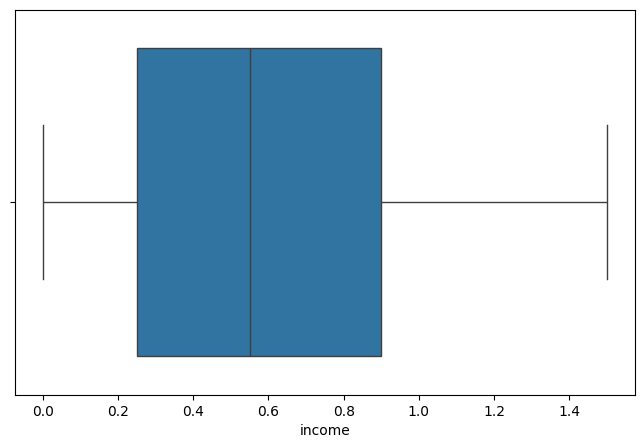

In [ ]:
# Summary of income of patients
plt.figure(figsize=(8,5))
sns.boxplot(x=data.income)
plt.show()

> _We can observe that most patients income lie between 25000 to 90000._

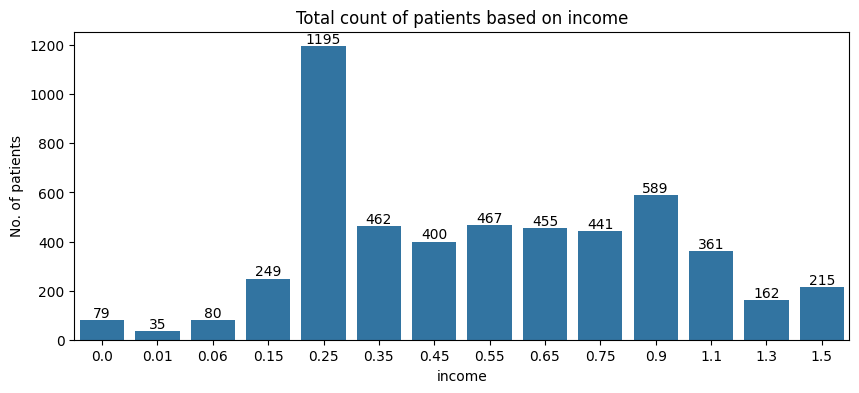

In [ ]:
# Total count of patients based on income
plt.figure(figsize=(10,4))
ax = sns.countplot(x = data.income)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on income')
plt.show()

In [ ]:
# Count of income of patients based on whether they have a private health insurance or not
pd.crosstab(data.private,data.income)

income,0.00,0.01,0.06,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.90,1.10,1.30,1.50
private,,,,,,,,,,,,,,
no,42,29,42,157,918,303,227,264,214,211,247,128,61,49
yes,37,6,38,92,277,159,173,203,241,230,342,233,101,166


In [ ]:
# Count of income of patients based on whether they qualifies for free healthcare due to low income
pd.crosstab(data.freepoor,data.income)

income,0.00,0.01,0.06,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.90,1.10,1.30,1.50
freepoor,,,,,,,,,,,,,,
no,65,28,66,214,1128,435,383,446,447,434,586,359,162,215
yes,14,7,14,35,67,27,17,21,8,7,3,2,0,0


In [ ]:
# Count of income of patients based on whether they qualifies for free healthcare due to being a old age, disability, veteran or similar status
pd.crosstab(data.freerepat,data.income)

income,0.00,0.01,0.06,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.90,1.10,1.30,1.50
freerepat,,,,,,,,,,,,,,
no,73,31,76,184,447,313,358,438,443,429,581,353,159,214
yes,6,4,4,65,748,149,42,29,12,12,8,8,3,1


In [ ]:
# Summary of income of patients based on whether they have a chronic condition
data.income.groupby(data.nchronic).describe()

,count,mean,std,min,25%,50%,75%,max
nchronic,,,,,,,,
no,3098.0,0.606750,0.367743,0.0,0.25,0.55,0.90,1.5
yes,2092.0,0.548227,0.367943,0.0,0.25,0.45,0.75,1.5


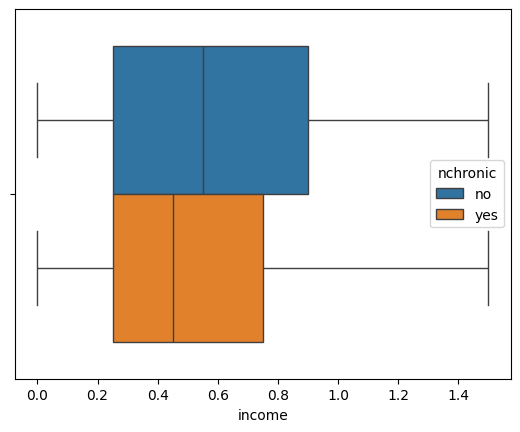

In [ ]:
sns.boxplot(x=data.income,hue=data.nchronic)
plt.show()

In [ ]:
# Summary of income of patients based on whether they have a long-term chronic conditions
data.income.groupby(data.lchronic).describe()

,count,mean,std,min,25%,50%,75%,max
lchronic,,,,,,,,
no,4585.0,0.591935,0.368229,0.0,0.25,0.55,0.90,1.5
yes,605.0,0.516661,0.367549,0.0,0.25,0.35,0.75,1.5


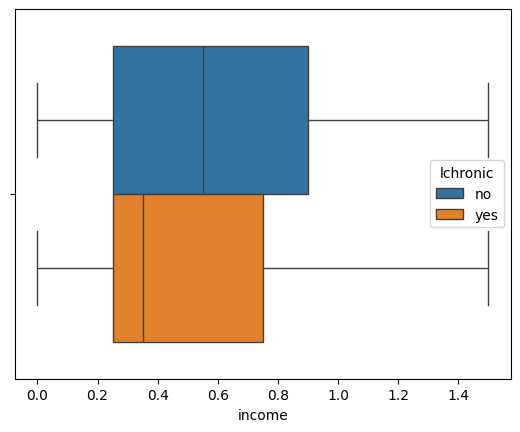

In [ ]:
sns.boxplot(x=data.income,hue=data.lchronic)
plt.show()

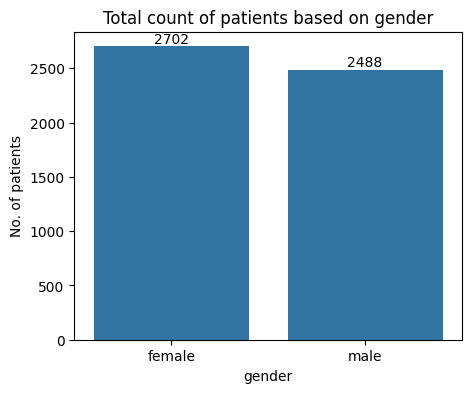

In [ ]:
# Count of patients based on gender
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.gender)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on gender')
plt.show()

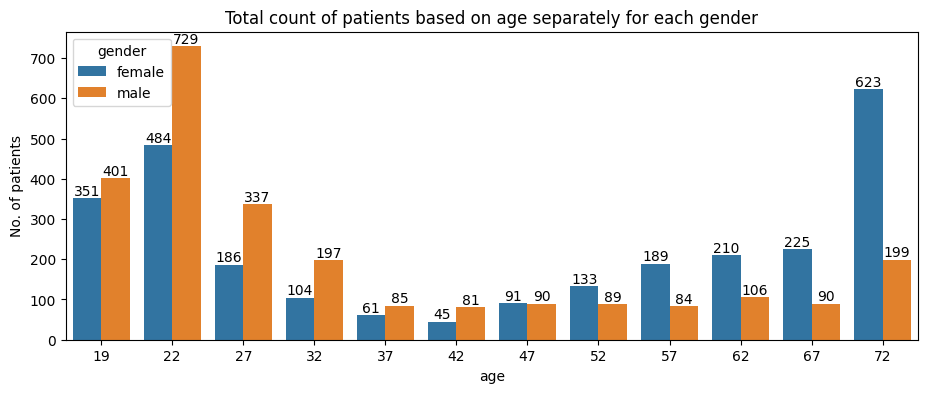

In [ ]:
# count of patients based on age separated by gender
plt.figure(figsize=(11,4))
ax=sns.countplot(hue=data.gender,x=data.age)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on age separately for each gender')
plt.show()

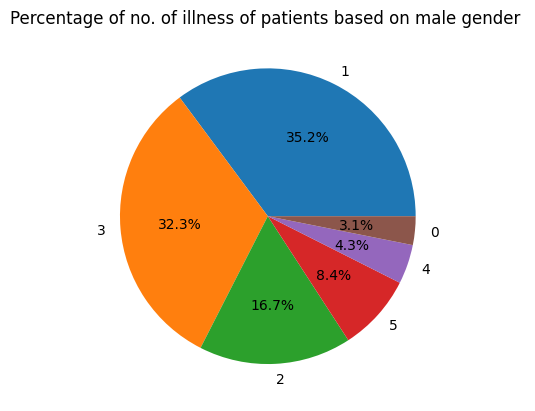

In [ ]:
# % of illness based on gender - male
plt.pie(data[data.gender=='male'].illness.value_counts(),labels=data.illness.unique(),autopct='%1.1f%%')
plt.title('Percentage of no. of illness of patients based on male gender ')
plt.show()

>_Most males patients have 1 illness and least have no illness_

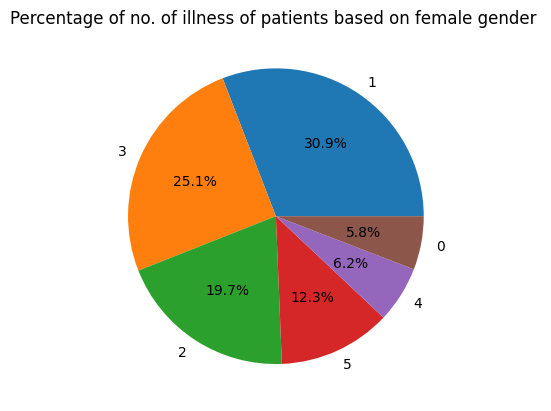

In [ ]:
# % of illness based on gender - female
plt.pie(data[data.gender=='female'].illness.value_counts(),labels=data.illness.unique(),autopct='%1.1f%%')
plt.title('female')
plt.title('Percentage of no. of illness of patients based on female gender ')
plt.show()

>_Most females patients have 1 illness and least have no illness_

In [ ]:
# no. of illness of patients based on gender due to reduced activity days
data.groupby(['gender','illness'])['reduced'].sum()

gender  illness
female  0           29
        1          904
        2          539
        3          415
        4          322
        5          427
male    0           50
        1          628
        2          443
        3          316
        4          183
        5          217
Name: reduced, dtype: int64

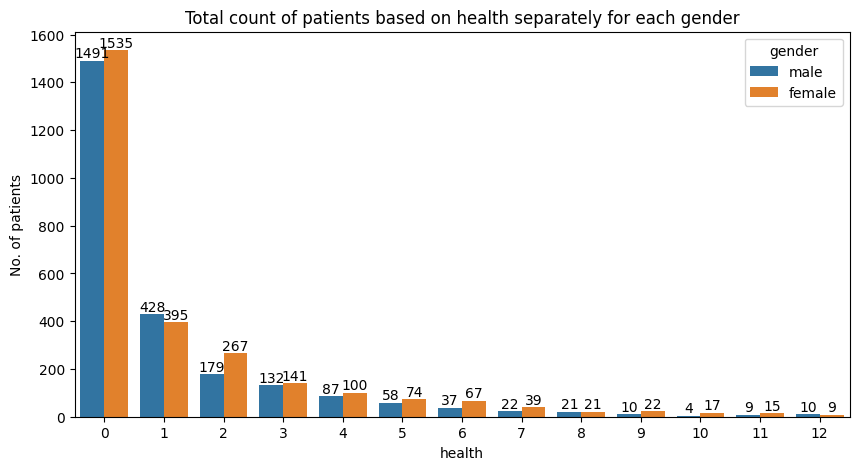

In [ ]:
# count of patients based on health separately for each gender
plt.figure(figsize=(10,5))
ax=sns.countplot(hue=data.gender,x=data.health)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on health separately for each gender')
plt.show()

In [ ]:
# Count of patients having chronic or long-term chronic conditions based on gender
data.groupby(['gender'])[['nchronic','lchronic']].count()

,nchronic,lchronic
gender,,
female,2702,2702
male,2488,2488


In [ ]:
print("Avg. visits of a patient:", data.visits.mean())

Avg. visits of a patient: 0.3017341040462428


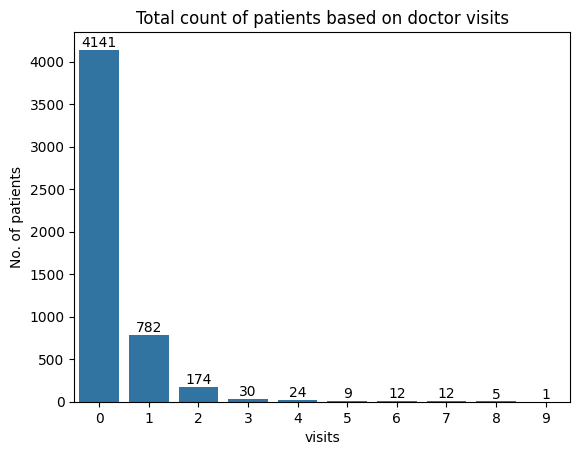

In [ ]:
# count of patients based on doctor visits
ax=sns.countplot(x=data.visits)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on doctor visits')
plt.show()

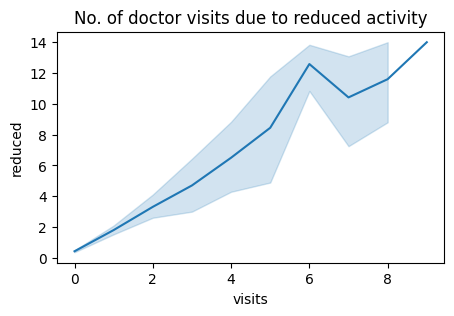

In [ ]:
# No. of doctor visits due to reduced activity
plt.figure(figsize=(5,3))
sns.lineplot(data=data, x="visits", y='reduced')
plt.title('No. of doctor visits due to reduced activity')
plt.show()


> _As the doctor visits increases then reduced activity days also increases_

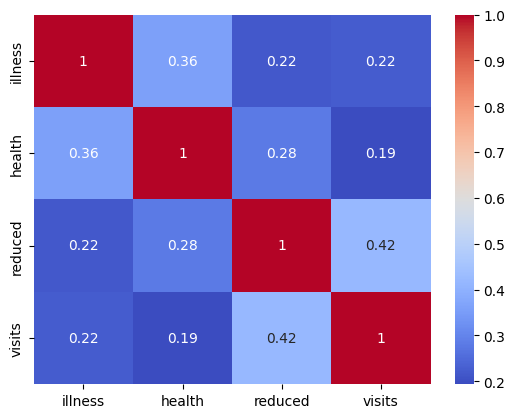

In [ ]:
# Correlation matrix
corr = data[['illness', 'health', 'reduced', 'visits']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

> _visits and reduced columns are Moderate correlated._
>
>_visits and health columns have No correlation._
>
>_rest all are Weak correlated_

In [ ]:
# Sum of chronic condition patient's doctor visits
data[data.nchronic=='yes'].visits.sum()

723

In [ ]:
# Count of patients having chronic conditions or not based on doctor visits
pd.crosstab(data.nchronic,data.visits)

visits,0,1,2,3,4,5,6,7,8,9
nchronic,,,,,,,,,,
no,2544,409,94,17,11,5,6,7,4,1
yes,1597,373,80,13,13,4,6,5,1,0


In [ ]:
# Sum of long-term chronic condition patient's doctor visits
data[data.lchronic=='yes'].visits.sum()

365

In [ ]:
# Count of patients having long-term chronic conditions or not based on doctor visits
pd.crosstab(data.lchronic,data.visits)

visits,0,1,2,3,4,5,6,7,8,9
lchronic,,,,,,,,,,
no,3748,642,130,20,19,8,6,9,3,0
yes,393,140,44,10,5,1,6,3,2,1


In [ ]:
# Total patient visits based on gender
data.visits.groupby(data.gender).sum()

gender
female    978
male      588
Name: visits, dtype: int64

> _Total doctor visits of female patients are 978 and for male patients are 588._

In [ ]:
# Count of patient visits based on gender
# same as data.gender.value_counts()
data.visits.groupby(data.gender).count()

gender
female    2702
male      2488
Name: visits, dtype: int64

> _Total count of female patients for doctor visits are 2702 and for males are 2488._

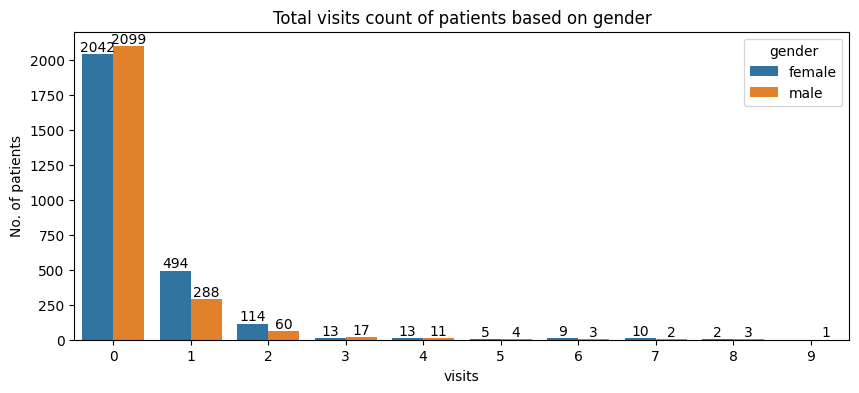

In [ ]:
# doctor visits count of patients based on gender
plt.figure(figsize=(10,4))
ax=sns.countplot(x=data.visits, hue=data.gender)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total visits count of patients based on gender')
plt.show()

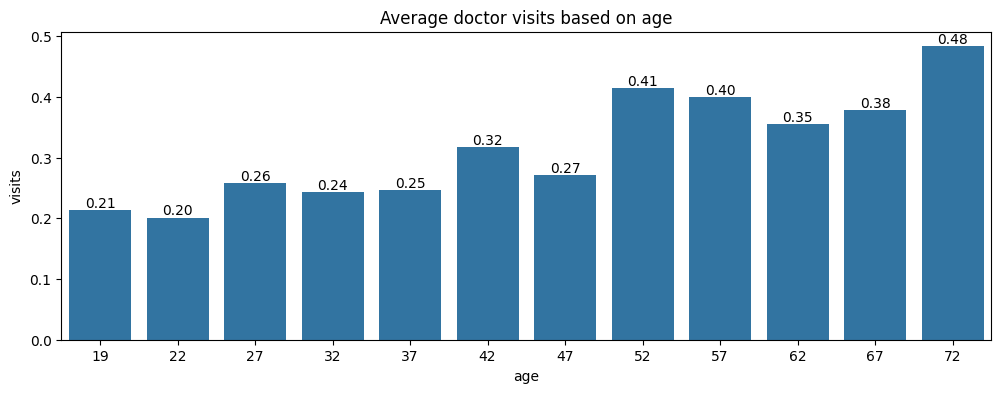

In [ ]:
# Average doctor visits based on age
plt.figure(figsize=(12,4))
ax=sns.barplot(x='age', y='visits', data=data, errorbar=None)
for bar in ax.containers:
  ax.bar_label(bar, fmt='%.2f')
plt.title("Average doctor visits based on age")
plt.show()

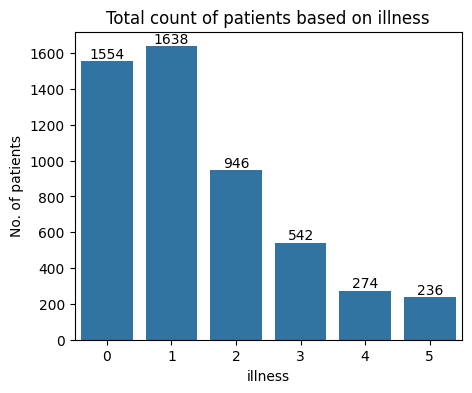

In [ ]:
# Count of patients based on illness
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.illness)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on illness')
plt.show()

> _Most patients have illness from 0 to 2_

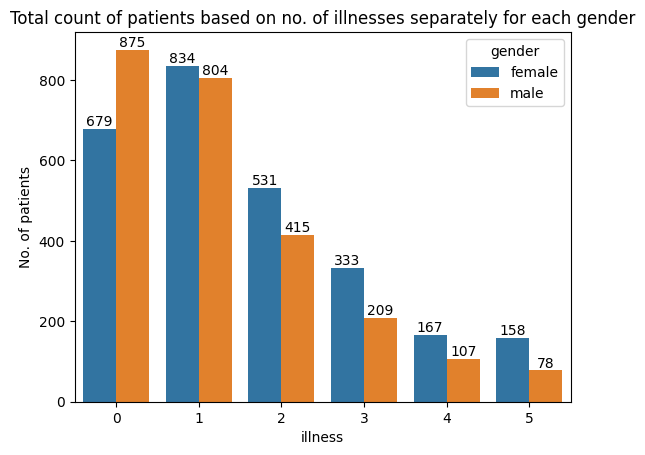

In [ ]:
# count of patients based on no. of illnesses separated by gender
ax=sns.countplot(hue=data.gender,x=data.illness)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on no. of illnesses separately for each gender')
plt.show()

In [ ]:
# Average no. of illnesses, age wise
data.groupby(['age'])['illness'].mean()

age
19    1.247340
22    1.197032
27    1.137667
32    1.222591
37    1.287671
42    1.206349
47    1.314917
52    1.608108
57    1.750916
62    1.677215
67    1.536508
72    2.009732
Name: illness, dtype: float64

In [ ]:
# Total no. of illnesses, age wise
data.groupby(['age'])['illness'].sum()

age
19     938
22    1452
27     595
32     368
37     188
42     152
47     238
52     357
57     478
62     530
67     484
72    1652
Name: illness, dtype: int64

In [ ]:
# Maximum no. of illnesses, age wise
data.groupby(['age'])['illness'].max()

age
19    5
22    5
27    5
32    5
37    5
42    5
47    5
52    5
57    5
62    5
67    5
72    5
Name: illness, dtype: int64

In [ ]:
# Minimum no. of illnesses, age wise
data.groupby(['age'])['illness'].min()

age
19    0
22    0
27    0
32    0
37    0
42    0
47    0
52    0
57    0
62    0
67    0
72    0
Name: illness, dtype: int64

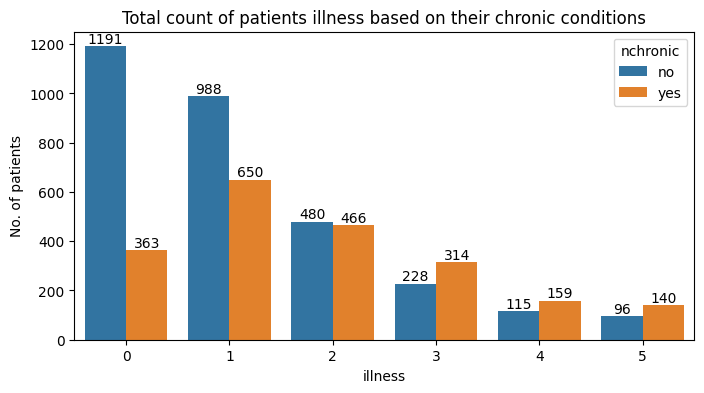

In [ ]:
# Count of patients illness based on their chronic conditions
plt.figure(figsize=(8,4))
ax=sns.countplot(x=data.illness, hue=data.nchronic)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients illness based on their chronic conditions')
plt.show()

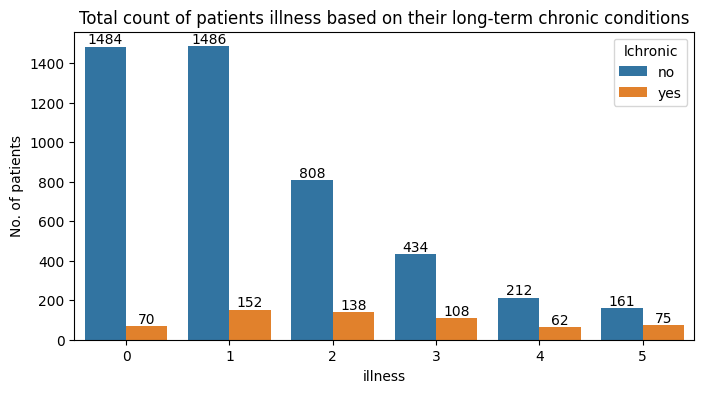

In [ ]:
# Count of patients illness based on their long-term chronic conditions
plt.figure(figsize=(8,4))
ax=sns.countplot(x=data.illness, hue=data.lchronic)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients illness based on their long-term chronic conditions')
plt.show()

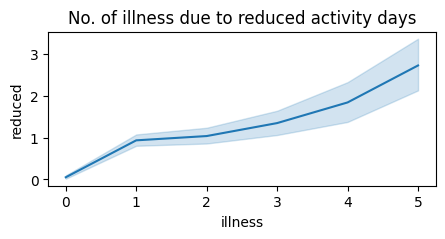

In [ ]:
# no. of illness due to reduced activity days
plt.figure(figsize=(5,2))
sns.lineplot(data=data, x="illness", y="reduced")
plt.title('No. of illness due to reduced activity days')
plt.show()


>_As the no. of illness of patients increases then reduced activity days increases_

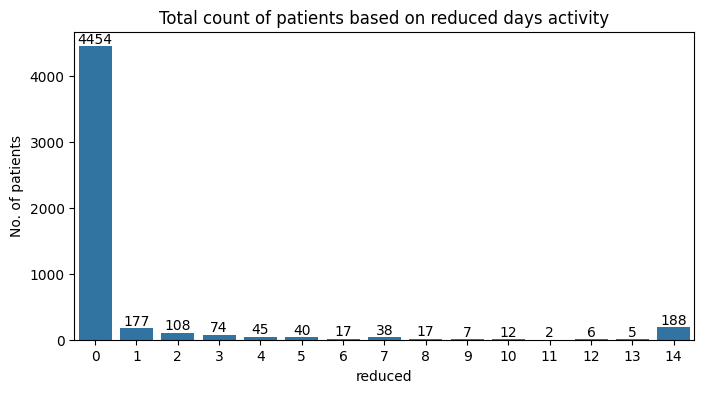

In [ ]:
# Count of patients based on reduced days activity
plt.figure(figsize=(8,4))
ax=sns.countplot(x=data.reduced)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on reduced days activity')
plt.show()

In [ ]:
# no. of days of reduced activity of male and female separately due to illness

data.groupby(['gender','reduced'])['illness'].sum()

gender  reduced
female  0          3341
        1           213
        2           123
        3           123
        4            60
        5            40
        6            26
        7            69
        8            24
        9             6
        10           18
        12            7
        13            9
        14          294
male    0          2385
        1           143
        2           125
        3            62
        4            37
        5            50
        6            15
        7            31
        8            16
        9            12
        10           13
        11            3
        12            6
        13           10
        14          171
Name: illness, dtype: int64

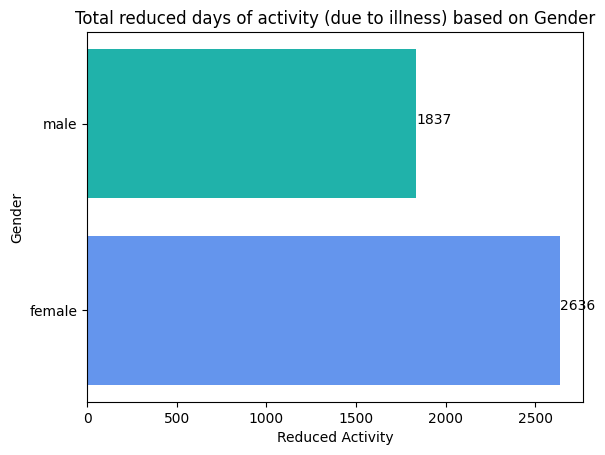

In [ ]:
# reduced days of activity (due to illness) based on Gender
df = data.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(df.gender, df.reduced, color=['cornflowerblue', 'lightseagreen'])
plt.ylabel('Gender')
plt.xlabel('Reduced Activity')
plt.title("Total reduced days of activity (due to illness) based on Gender")
for index, value in enumerate(df.reduced):
    plt.text(value, index, str(value))
plt.show()

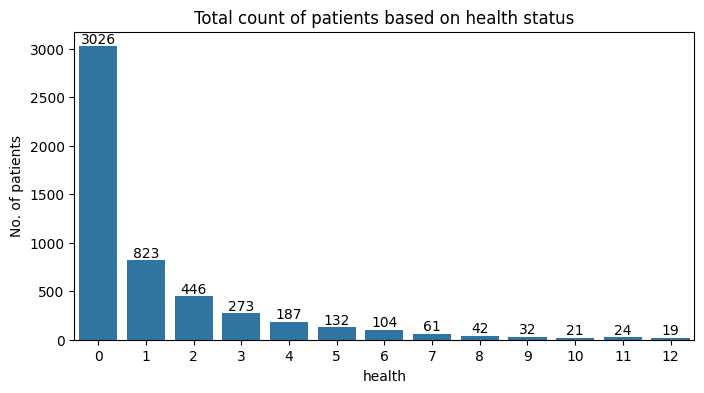

In [ ]:
# Count of patients based on health status
plt.figure(figsize=(8,4))
ax=sns.countplot(x=data.health)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on health status')
plt.show()

In [ ]:
# Count of patients health status based on chronic conditions
pd.crosstab(data.nchronic,data.health)

health,0,1,2,3,4,5,6,7,8,9,10,11,12
nchronic,,,,,,,,,,,,,
no,1868,466,246,153,109,74,59,42,26,18,9,15,13
yes,1158,357,200,120,78,58,45,19,16,14,12,9,6


In [ ]:
# Count of patients health status based on long-term chronic conditions
pd.crosstab(data.lchronic,data.health)

health,0,1,2,3,4,5,6,7,8,9,10,11,12
lchronic,,,,,,,,,,,,,
no,2790,732,377,220,145,110,80,39,30,21,15,14,12
yes,236,91,69,53,42,22,24,22,12,11,6,10,7


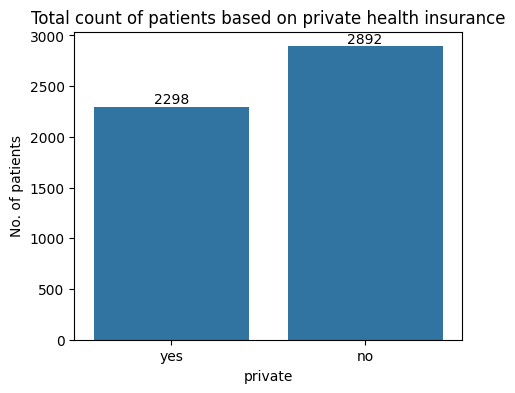

In [ ]:
# Count of patients based on private health insurance
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.private)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on private health insurance')
plt.show()

In [ ]:
# Count of patients having private health insurance or not based on chronic conditions
data.private.groupby(data.nchronic).count()

nchronic
no     3098
yes    2092
Name: private, dtype: int64

In [ ]:
# Count of patients having private health insurance or not based on long -term chronic conditions
data.private.groupby(data.lchronic).count()

lchronic
no     4585
yes     605
Name: private, dtype: int64

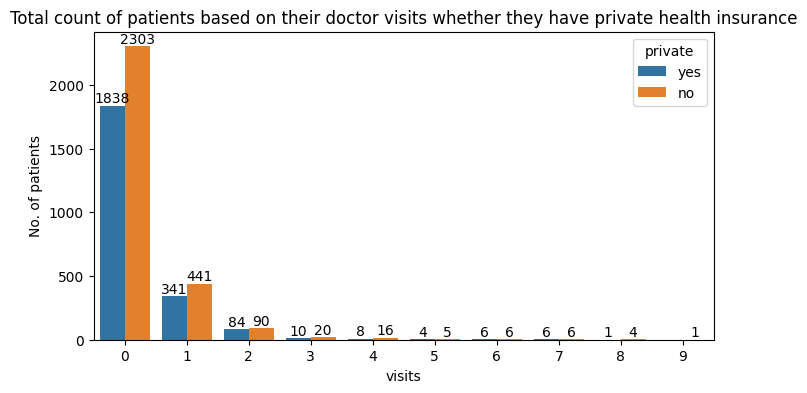

In [ ]:
# Count of patients according to their doctor visits whether they have private health insurance
plt.figure(figsize=(8,4))
ax=sns.countplot(x=data.visits, hue=data.private)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on their doctor visits whether they have private health insurance')
plt.show()

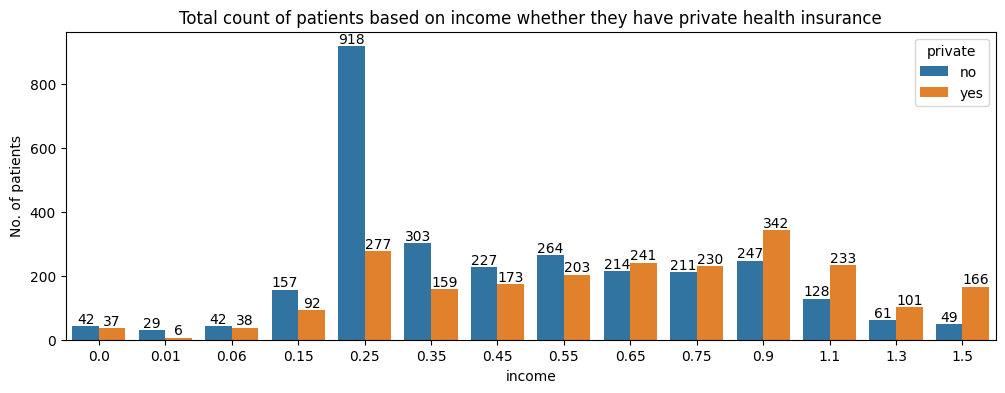

In [ ]:
# Count of patients according to their income whether they have private health insurance
plt.figure(figsize=(12,4))
ax=sns.countplot(x=data.income,hue=data.private)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on income whether they have private health insurance')
plt.show()

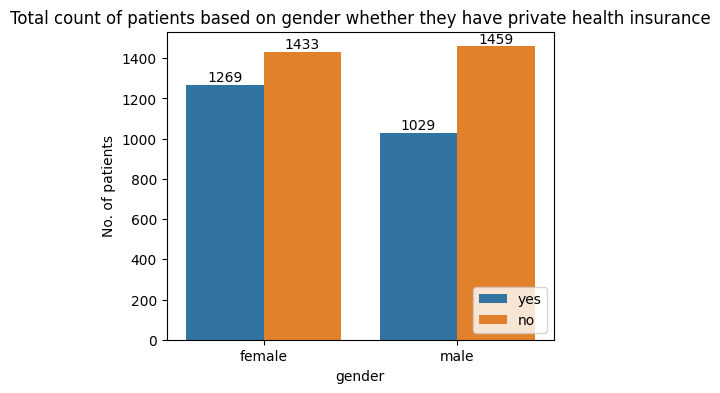

In [ ]:
# Count of patients according to their gender whether they have private health insurance
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.gender,hue=data.private)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on gender whether they have private health insurance')
plt.legend(loc="lower right")
plt.show()

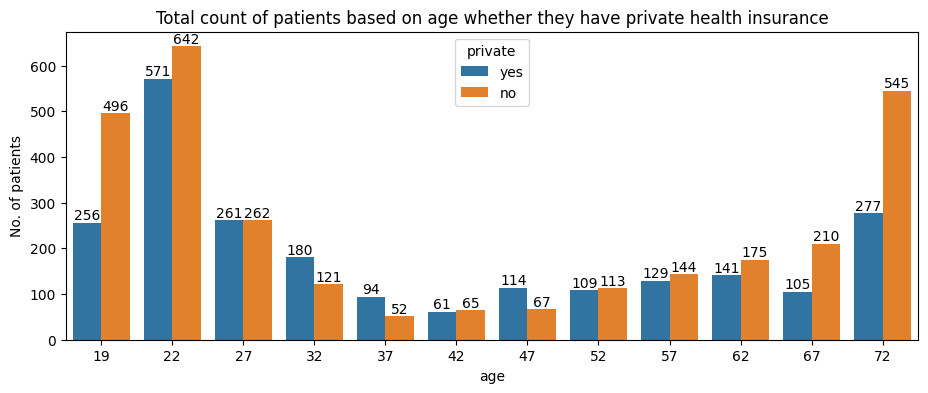

In [ ]:
# Count of patients according to their age whether they have private health insurance
plt.figure(figsize=(11,4))
ax=sns.countplot(x=data.age,hue=data.private)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on age whether they have private health insurance')
plt.show()

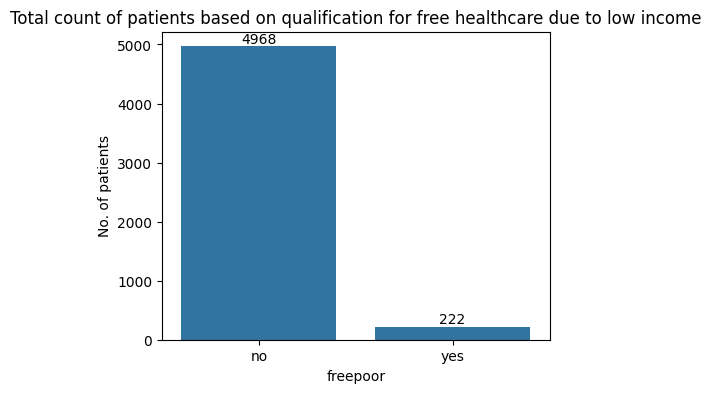

In [ ]:
# Count of patients based on qualification for free healthcare due to low income
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.freepoor)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on qualification for free healthcare due to low income')
plt.show()

In [ ]:
# Shows the count of patients qualifying for free healthcare due to low income based on chronic conditions
data.freepoor.groupby(data.nchronic).count()

nchronic
no     3098
yes    2092
Name: freepoor, dtype: int64

In [ ]:
# Shows the count of patients qualifying for free healthcare due to low income based on long-term chronic conditions
data.freepoor.groupby(data.lchronic).count()

lchronic
no     4585
yes     605
Name: freepoor, dtype: int64

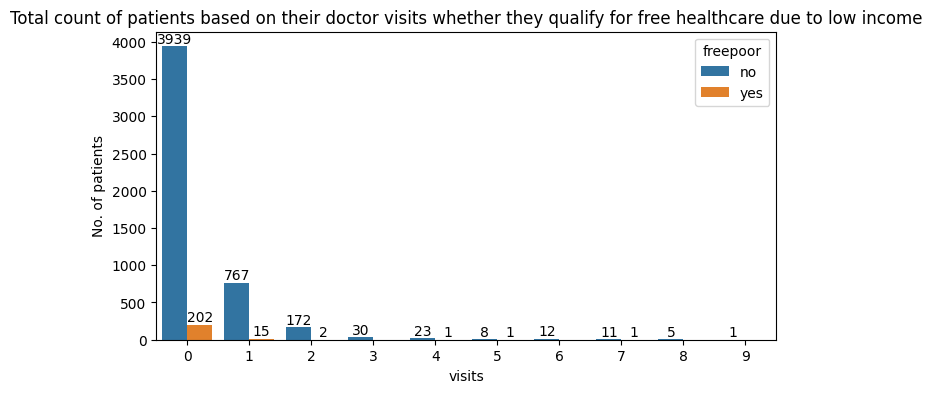

In [ ]:
# Count of patients according to their doctor visits whether they qualify for free healthcare due to low income
plt.figure(figsize=(8,4))
ax=sns.countplot(x=data.visits, hue=data.freepoor)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on their doctor visits whether they qualify for free healthcare due to low income')
plt.show()

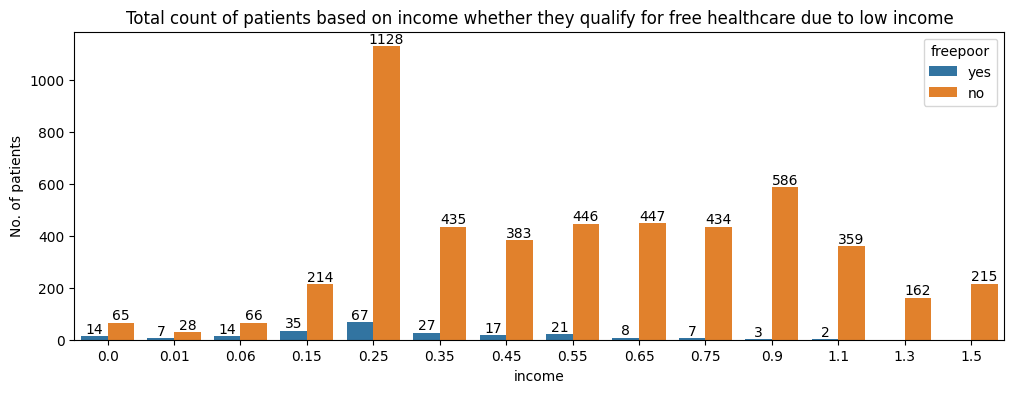

In [ ]:
# Count of patients according to their income whether they qualify for free healthcare due to low income
plt.figure(figsize=(12,4))
ax=sns.countplot(x=data.income,hue=data.freepoor)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on income whether they qualify for free healthcare due to low income')
plt.show()

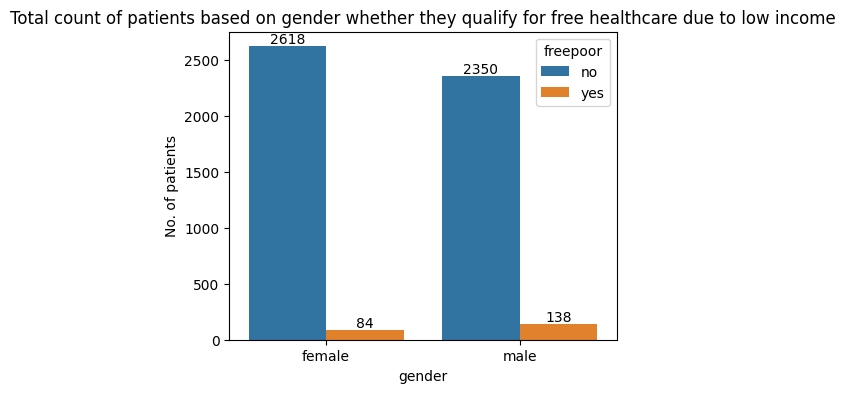

In [ ]:
# Count of patients according to their gender whether they qualify for free healthcare due to low income
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.gender,hue=data.freepoor)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on gender whether they qualify for free healthcare due to low income')
plt.show()

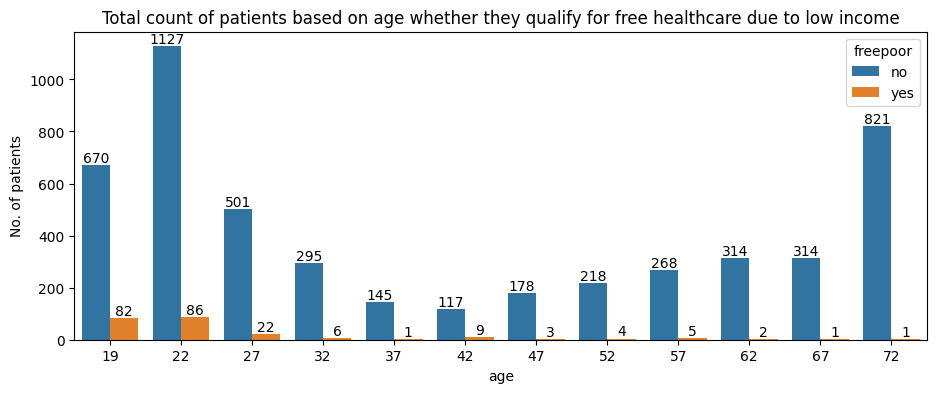

In [ ]:
# Count of patients according to their age whether they qualify for free healthcare due to low income
plt.figure(figsize=(11,4))
ax=sns.countplot(x=data.age,hue=data.freepoor)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on age whether they qualify for free healthcare due to low income')
plt.show()

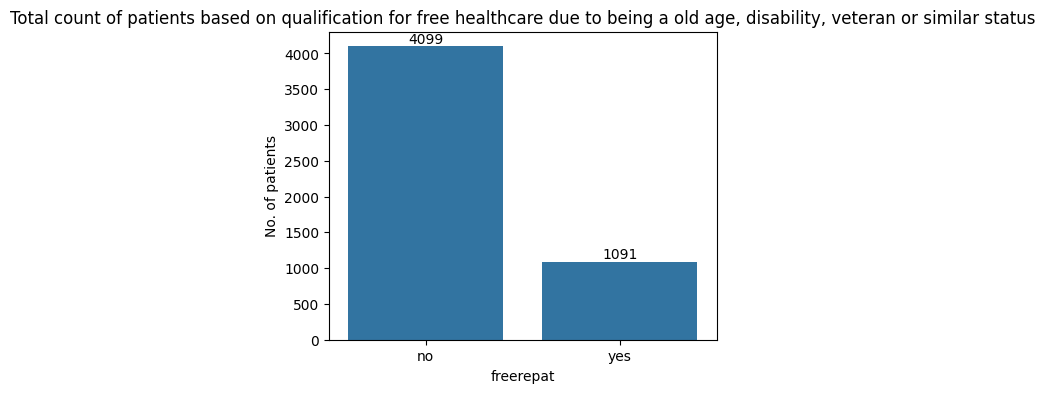

In [ ]:
# Count of patients based on qualification for free healthcare due to being a old age, disability, veteran or similar status
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.freerepat)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on qualification for free healthcare due to being a old age, disability, veteran or similar status')
plt.show()

In [ ]:
# Shows the count of patients with private health insurance VS patients with free healthcare due to low income.
data[['private','freepoor']].value_counts()

private  freepoor
no       no          2670
yes      no          2298
no       yes          222
Name: count, dtype: int64

> _There are 2670 patients with no private health insurance and free healthcare due to low income._
>
> _There are 2298 patients with private insurance and 222 patients with free healthcare due to low income._

In [ ]:
# Shows the count of patients who qualifies for free healthcare due to low income VS patients who qualifies for free healthcare due to being a old age, disability, veteran.
pd.crosstab(data['freerepat'],data['freepoor'])

freepoor,no,yes
freerepat,,
no,3877,222
yes,1091,0


> _There are 3877 patients who qualifies for free healthcare due to low income or being a old age, disability, veteran._
>
> _There are 1091 patients who qualifies for free healthcare due to being a old age, disability, veteran or similar status._
>
> _There are 222 patients who qualifies for free healthcare due to low income._

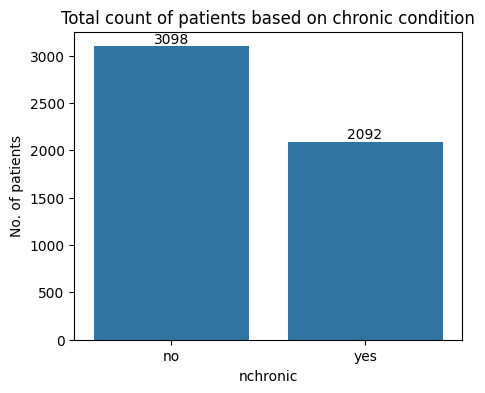

In [ ]:
# Count of patients based on chronic condition
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.nchronic)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on chronic condition')
plt.show()

In [ ]:
# Shows the counts of patients having chronic condition or not based on age
pd.crosstab(data.nchronic,data.age)

age,19,22,27,32,37,42,47,52,57,62,67,72
nchronic,,,,,,,,,,,,
no,576,862,363,191,104,82,101,113,138,145,115,308
yes,176,351,160,110,42,44,80,109,135,171,200,514


In [ ]:
# Shows the counts of patients having chronic condition or not vs patients having long-term chronic conditions
pd.crosstab(data.nchronic, data.lchronic)

lchronic,no,yes
nchronic,,
no,2493,605
yes,2092,0


> _There are 2493 patients having no chronic condition and no long-term chronic conditions._
>
> _There are 2092 patients having chronic conditions and 605 patients having long-term chronic conditions._


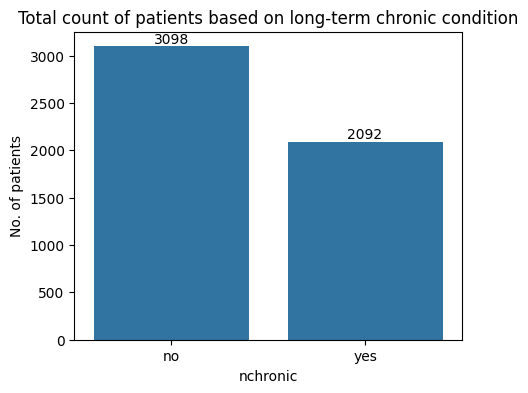

In [ ]:
# Count of patients based on long-term chronic condition
plt.figure(figsize=(5,4))
ax=sns.countplot(x=data.nchronic)
for bar in ax.containers:
  ax.bar_label(bar)
plt.ylabel('No. of patients')
plt.title('Total count of patients based on long-term chronic condition')
plt.show()

In [ ]:
# Shows the counts of patients having long-term chronic condition or not based on age
pd.crosstab(data.lchronic,data.age)

age,19,22,27,32,37,42,47,52,57,62,67,72
lchronic,,,,,,,,,,,,
no,712,1132,468,269,122,100,154,176,217,239,296,700
yes,40,81,55,32,24,26,27,46,56,77,19,122
